# PCA and CFA. Code for extracting k factors (K hard coded at 2 here). Users need to puta simple for loop for changing values of k. Users need to change the directory where the data is located.This analysis uses variables 1, 2 and 5 from GermanCredit data set. (In Class Exercise)

## Getting external libraries

In [1]:
#!pip install factor-analyzer
#!pip install advanced-pca
#!pip install rotate
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sb  
#for plotting heatmaps
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from advanced_pca import CustomPCA
from sklearn import datasets
#from rotate import Varimax
np.set_printoptions(precision=3)

# read in comma-delimited text file, creating a pandas DataFrame object

   Duration  Amount  InstallmentRatePercentage  ResidenceDuration  Age  \
0         6    1169                          4                  4   67   
1        48    5951                          2                  2   22   
2        12    2096                          2                  3   49   
3        42    7882                          2                  4   45   
4        24    4870                          3                  4   53   

   NumberExistingCredits  NumberPeopleMaintenance  Telephone  ForeignWorker  \
0                      2                        1          0              1   
1                      1                        1          1              1   
2                      1                        2          1              1   
3                      1                        2          1              1   
4                      2                        2          1              1   

  Class  ...  OtherInstallmentPlans.Bank  OtherInstallmentPlans.Stores  \
0  Goo

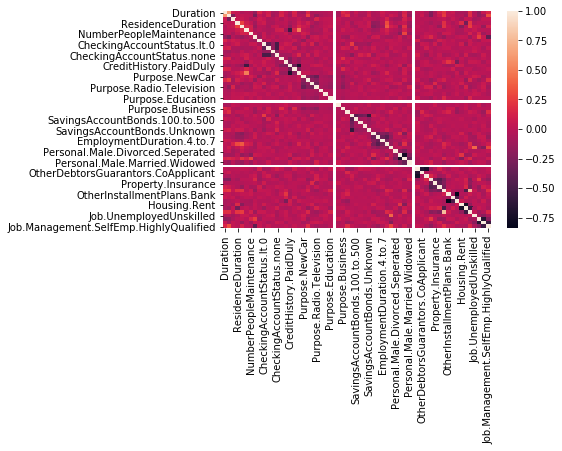

In [2]:
MyData = pd.read_csv('C:/Users/anilc/OneDrive/Desktop/Anil/Data Mining/Python Code and PDF/kmeans_data.csv')
print(MyData.head())
sb.heatmap(MyData.corr())

#np.array(df.to_array()) could use this potentially to covnvert df to array
MyData_array=MyData.values
#MyData_array2=MyData.as_matrix()

print('\nDescriptive statistics for German Credit data ---------------')
print(MyData.describe())


# examine the structure of the DataFrame object
print('\nContents of Initial Data  ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(MyData)) 

MyData_for_factor=scale(MyData_array[:,[0,1,4]])

# Fixing number of Components at 2

In [3]:
k=2

# This is where PCA is executed

[[ 0.707 -0.052]
 [ 0.707  0.057]
 [-0.004  0.997]]
Variance explained by Components are: 
 [1.627 1.005]
Percent Variance explained by Components are:
 [0.542 0.335]
The top rows of fit_transform dataframe is 
           0         1
0 -1.411988  2.779563
1  2.266081 -1.249941
2 -0.821492  1.194185
3  2.390063  0.831963
4  0.576390  1.549696
The top rows of fit_transform dataframe is 
           0         1         2
0 -1.142679 -0.838902  2.776727
1  1.667396  1.530442 -1.254996
2 -0.642879 -0.512322  1.193800
3  1.647138  1.737462  0.820198
4  0.327282  0.496356  1.542823


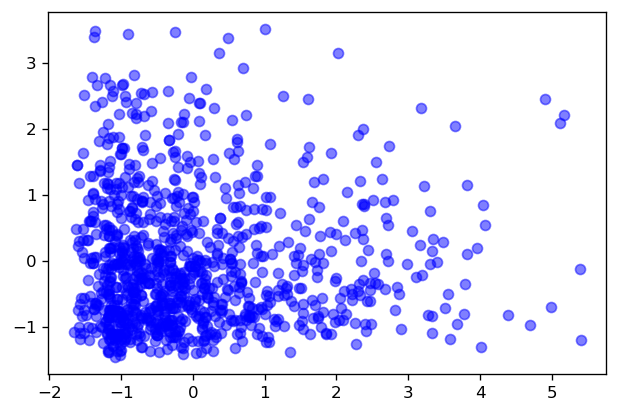

In [4]:
myPCA=PCA(n_components=k)
x=myPCA.fit(MyData_for_factor)
print(x.components_.T)
print("Variance explained by Components are: \n", x.explained_variance_)
print("Percent Variance explained by Components are:\n", x.explained_variance_ratio_)

y=myPCA.fit_transform(MyData_for_factor)
plt.figure(dpi=120)
plt.scatter(y[:,0], y[:,1], alpha = 0.5,color="blue")
print("The top rows of fit_transform dataframe is \n", pd.DataFrame(y).head())
z=myPCA.inverse_transform(y)

print("The top rows of fit_transform dataframe is \n", pd.DataFrame(z).head())
# Note that in case of train-test, you would use transfrom(test_data).

# This is Factor Analysis code - using FactorAnalyzer with Varimax rotations and oblimax rotations.

In [6]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer import (ConfirmatoryFactorAnalyzer, 
                             ModelSpecificationParser)

fa = FactorAnalyzer(rotation="varimax")

fa.fit(MyData_for_factor)
print("The factor loadings after Varimax roation are \n", fa.loadings_)
print("The communalities are \n", fa.get_communalities())

fa = FactorAnalyzer(rotation="oblimax")

fa.fit(MyData_for_factor)
print("The factor loadings after Oblimax roation are \n", fa.loadings_)
print("The communalities are \n", fa.get_communalities())

The factor loadings after Varimax roation are 
 [[ 0.802 -0.135  0.   ]
 [ 0.802  0.131  0.   ]
 [-0.002  0.259  0.   ]]
The communalities are 
 [0.661 0.66  0.067]
The factor loadings after Oblimax roation are 
 [[ 0.615  0.532  0.   ]
 [ 0.753  0.305  0.   ]
 [ 0.133 -0.222  0.   ]]
The communalities are 
 [0.661 0.66  0.067]


# This is the Confirmatory Factor Analysis code - using FactorAnalyzer

In [7]:
model_dict = {"Finance": ["Duration", "Amount"], 
              "Age": ["Age"]}
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(MyData_for_factor,
                                                                          model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(MyData_for_factor)
print("The CFA Loadings are \n", cfa.loadings_)
print("The Variance-Covariance of factors are \n", cfa.factor_varcovs_)
print("The fit.transform matrix produced is \n", cfa.transform(MyData_for_factor))

The CFA Loadings are 
 [[4.046 0.   ]
 [0.155 0.   ]
 [0.    0.687]]
The Variance-Covariance of factors are 
 [[ 1.    -0.021]
 [-0.021  1.   ]]
The fit.transform matrix produced is 
 [[-0.199  4.027]
 [ 0.424 -1.734]
 [-0.123  1.723]
 ...
 [-0.054  0.314]
 [ 0.583 -1.606]
 [ 0.435 -1.094]]


C:\Users\anilc\anaconda3\lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:733: UserWarning: The optimization routine failed to converge: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  'to converge: {}'.format(str(res.message)))



# Following code might be used for Varimax rotations using CustomPCA, from package advancd-pca. Package published 6/1/2020. Has bugs


In [8]:
#dataset = datasets.load_diabetes()
#X_std = StandardScaler().fit_transform(dataset.data)
#print('The Dataset shape is', dataset.shape())

# fit pca objects with and without rotation with 5 principal components
#standard_pca5 = CustomPCA(n_components=5).fit(X_std)
#varimax_pca5 = CustomPCA(n_components=5, rotation='varimax').fit(X_std)

# display factor matrices and number of cross loadings
#print('Factor matrix:\n', standard_pca5.components_.round(1))
#print(' Number of cross-loadings:', standard_pca5.count_cross_loadings())
#print('\nRotated factor matrix:\n', varimax_pca5.components_.round(1))
#print(' Number of cross_loadings:', varimax_pca5.count_cross_loadings()